**Susie Mueller**

Spring 2024

CS 251 / 252: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 2: Principal component analysis

In this task, you will implement principal component analysis (PCA) to reduce the dimensionality of data while maximizing the information that is preserved. You will use the mystery dataset to test your code and ultimately compare how PCA reduces the dimensionality from 3D to 2D with your manual rotation and projection.

In [6]:
import pca

### 2a. Import mystery dataset

In the below cell:
- load in the mystery dataset (`mystery.csv`) into a pandas DataFrame called `mys_data`.
- select the `x`, `y`, and `z` variables (drop the `color` variable).
- print out the head (only showing the first 5 data samples).
- create an `PCA` object called `mys_pca` based on the DataFrame that you just created.

Your code should print something that looks like this:
```
          x           y           z
0  6.183216   86.707892   90.551566
1  0.969658   16.972285  137.976605
2  0.727076   57.112193  139.795502
3  8.433828   30.348513  113.600202
4  8.188306  133.978413  120.671505
```

In [7]:
mys_data = pd.read_csv('data/mystery.csv')
mys_data = mys_data[['x', 'y', 'z']]
print(mys_data.head(6))
mys_pca = pca.PCA(mys_data)

          x           y           z
0  6.183216   86.707892   90.551566
1  0.969658   16.972285  137.976605
2  0.727076   57.112193  139.795502
3  8.433828   30.348513  113.600202
4  8.188306  133.978413  120.671505
5  8.443229  104.625144  166.745017


### 2b. Implement PCA

Implement and test the following methods necessary to perform PCA in `pca.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `fit`: Method to compute the PCs of the dataset (e.g. eigenvectors, eigenvalues).
- `elbow_plot`: Plots the cumulative variance accounted for with different numbers of PCS.
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [8]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = mys_pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [30]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = mys_pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [9]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = mys_pca.compute_prop_var(test_evals)
accum_var = mys_pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `fit`

Performs PCA using the covariance matrix method.

In [10]:
# Test pca (no normalization) here
mys_headers = list(mys_data.columns)
mys_pca.fit(mys_headers)

# test that instance variable shape are correct
print(f'There are {len(mys_pca.vars)} vars in Mystery PCA and there should be 3.')
print(f'The original PCA data has shape {mys_pca.A.shape} and should be (2000, 3).')
print(f'Eigenvector shape: {mys_pca.e_vecs.shape} should be (3, 3).\nEigenvalue shape: {mys_pca.e_vals.shape} should be (3,).')
print(f'Length of proportion variance account for: {len(mys_pca.get_prop_var())} should be 3.')
print(f'Length of cumulative proportion variance account for: {len(mys_pca.get_cum_var())} should be 3.')
print()

# Test values
print(f"Your vars in Mystery PCA:\n{mys_pca.vars}  and they should be\n['x', 'y', 'z']")
print(f'Your eigenvectors:\n{mys_pca.e_vecs}. They should be\n[[ 0.0048  -0.00307  0.99998]\n [ 0.00747 -0.99997 -0.00311]\n [ 0.99996  0.00749 -0.00478]].')
print(f'Your eigenvalues:\n{mys_pca.e_vals}. They should be\n[4922.17303  975.37206   10.95308]')
print(f'Cumulative proportion variance account for:\n{mys_pca.get_cum_var()}. It should be\n[0.8330666933541857, 0.9981462157185522, 1.0].')



There are 3 vars in Mystery PCA and there should be 3.
The original PCA data has shape (2000, 3) and should be (2000, 3).
Eigenvector shape: (3, 3) should be (3, 3).
Eigenvalue shape: (3,) should be (3,).
Length of proportion variance account for: 3 should be 3.
Length of cumulative proportion variance account for: 3 should be 3.

Your vars in Mystery PCA:
['x', 'y', 'z']  and they should be
['x', 'y', 'z']
Your eigenvectors:
[[ 0.0048  -0.00307  0.99998]
 [ 0.00747 -0.99997 -0.00311]
 [ 0.99996  0.00749 -0.00478]]. They should be
[[ 0.0048  -0.00307  0.99998]
 [ 0.00747 -0.99997 -0.00311]
 [ 0.99996  0.00749 -0.00478]].
Your eigenvalues:
[4922.17303  975.37206   10.95308]. They should be
[4922.17303  975.37206   10.95308]
Cumulative proportion variance account for:
[0.8330666933541859, 0.9981462157185523, 1.0]. It should be
[0.8330666933541857, 0.9981462157185522, 1.0].


In [11]:
# Test pca (normalization) here
mys_headers = list(mys_data.columns)
mys_pca.fit(mys_headers, normalize_dataset=True)

# test that instance variable shape are correct
print(f'There are {len(mys_pca.vars)} vars in Mystery PCA and there should be 3.')
print(f'The original PCA data has shape {mys_pca.A.shape} and should be (2000, 3).')
print(f'Eigenvector shape: {mys_pca.e_vecs.shape} should be (3, 3).\nEigenvalue shape: {mys_pca.e_vals.shape} should be (3,).')
print(f'Length of proportion variance account for: {len(mys_pca.get_prop_var())} should be 3.')
print(f'Length of cumulative proportion variance account for: {len(mys_pca.get_cum_var())} should be 3.')
print(f'Data min/max is {mys_pca.A.min()}/{mys_pca.A.max()} should be 0.0/1.0')
print()

# Test values
print(f'Your eigenvalues:\n{mys_pca.e_vals}. They should be\n[0.07135 0.05681 0.04928]')
print(f'Cumulative proportion variance account for:\n{mys_pca.get_cum_var()}. It should be\n[0.402116890496464, 0.7222698215107564, 1.0].')



There are 3 vars in Mystery PCA and there should be 3.
The original PCA data has shape (2000, 3) and should be (2000, 3).
Eigenvector shape: (3, 3) should be (3, 3).
Eigenvalue shape: (3,) should be (3,).
Length of proportion variance account for: 3 should be 3.
Length of cumulative proportion variance account for: 3 should be 3.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.07135 0.05681 0.04928]. They should be
[0.07135 0.05681 0.04928]
Cumulative proportion variance account for:
[0.402116890496464, 0.7222698215107562, 1.0]. It should be
[0.402116890496464, 0.7222698215107564, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

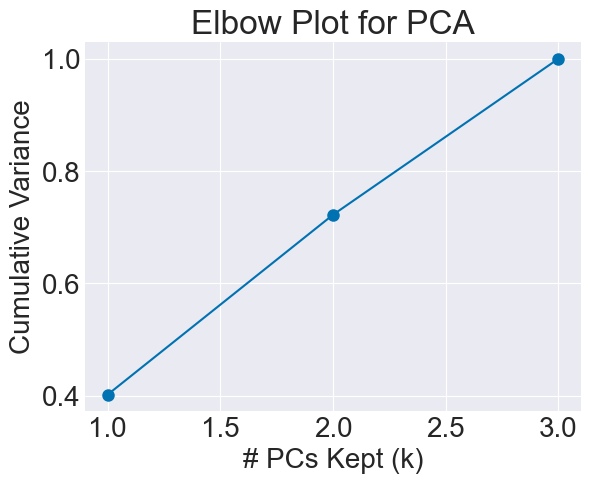

In [12]:
# test elbow plot
mys_pca.elbow_plot()
plt.show()

#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`) then make a 2D scatter plot showing your PCA projected data. Label the x and y axes appropriately.

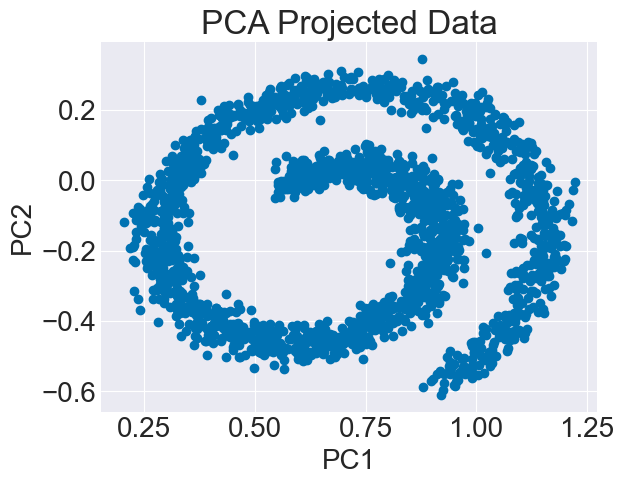

In [13]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
mys_proj = mys_pca.pca_project(pcs_to_keep)

plt.plot(mys_proj[:, 0], mys_proj[:, 1], 'o' )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projected Data')
plt.show()

### 2c. Questions

**Question 6:** Based on the Mystery elbow plot (Task 2b (v)), how many principal components would you drop and **why?**

**Question 7:** How does the the PCA projected version of the mystery dataset compare to the projection that you achieved onto the `x`-`y` plane after rotating the dataset? **Why is there this similarity or difference in the results?**

**Answer 6:** 

**Answer 7:** 